# 1.Information   
---------------------------------------------------
* Author : Stanislaus Kanopi Johan Trielianto 
* Reference : Udemy_Machine Learning Real World project in Python  
* Time making : 18.01.2024
* Database : Hotel cancelation data  

# 2. Import Package  
---------------------

In [312]:
#  Standart 
import pandas as pd 
import numpy as np

# For eda 
import plotly
import chart_studio.plotly as py 
from plotly.offline import download_plotlyjs,init_notebook_mode, plot ,iplot 
init_notebook_mode(connected =True)

import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt

# For correlation 
from phik.report import plot_correlation_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# For encoding , scaling 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# For see the model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 3.Data Cleaning / Data exploration 
------ 

## Data  Cleaning 

>Read Csv using pandas 

In [240]:
df = pd.read_csv("hotel_bookings.csv")

> Show 10 data ,5 data head ,5 data tail 

In [241]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [242]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [243]:
df.shape

(119390, 32)

Data have 1119... entry ,and  32 collumn 

In [244]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Insight : Country ,Agent , and Company  have missing values 

>Delete the collumn agent and company because its  so much missing value . 

In [245]:
df.drop(['agent','company'],axis=1,inplace=True)

In [246]:
df.country.value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

>Data input using most much country values

In [247]:
df.country.fillna(df.country.value_counts().index[0],inplace=True)

In [248]:
df.children.value_counts().index[0]

0.0

> Data input using most children values  

In [249]:
df.children.fillna(df.children.value_counts().index[0],inplace=True)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Explore

>Check label data ,Data is canceled

In [251]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

Insight : We know that cancel  is 44k and no cancel is 75 k   

In [252]:
Country_wise_data =df[df['is_canceled']==0]['country'].value_counts().reset_index()

In [253]:
Country_wise_data.columns=['country','no_of_guest']

In [254]:
px.choropleth(Country_wise_data,
                locations=Country_wise_data['country'],
                color=Country_wise_data['no_of_guest'],
                hover_name=Country_wise_data['country'],
                title='Home Country of guest')

> How much average price of room type .

In [255]:
df2 =df[df['is_canceled']==0]

In [256]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

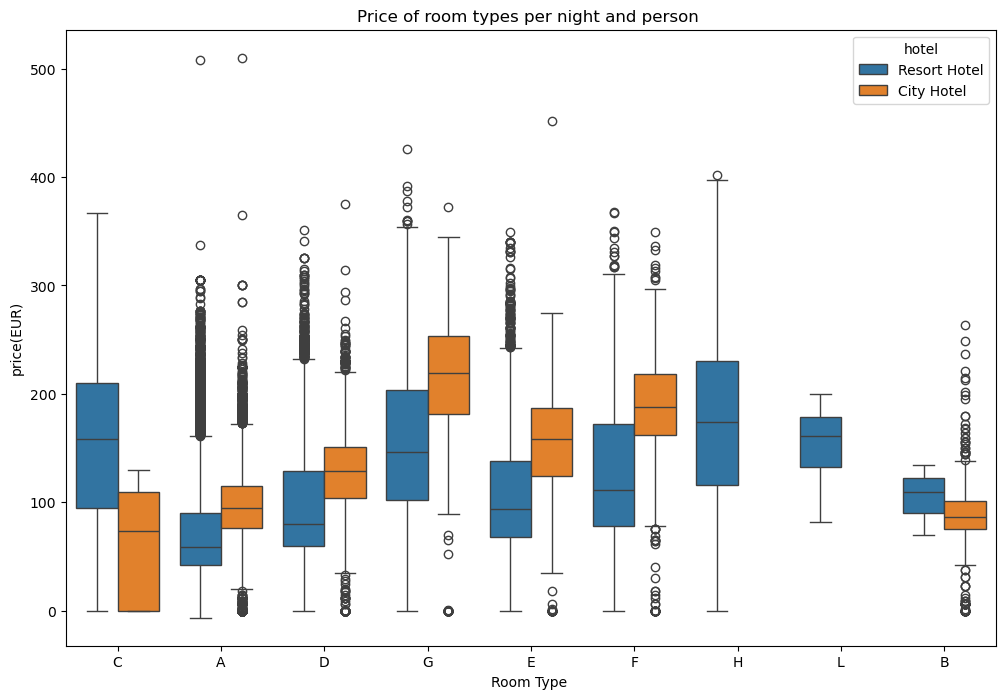

In [257]:
plt.figure (figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=df2)
plt.title('Price of room types per night and person ')
plt.xlabel('Room Type ')
plt.ylabel('price(EUR)')

> Can you analyse correlation beetwen Resort hotel and City Hotel ,depends on the season

In [258]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [259]:
df_resort=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)] 
df_city = df [(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [260]:
df_resort.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [261]:
rush_resort = df_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [262]:
rush_city=df_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [263]:
final_rush=rush_resort.merge(rush_city,on='month')

In [264]:
final_rush

,month,no_of_guests_x,no_of_guests_y
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [265]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_in_city']

In [266]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_in_city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [267]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort','no_of_guests_in_city'])

In [268]:
#Shit i always tought that my pain gonna go away but i was pretty wrong 

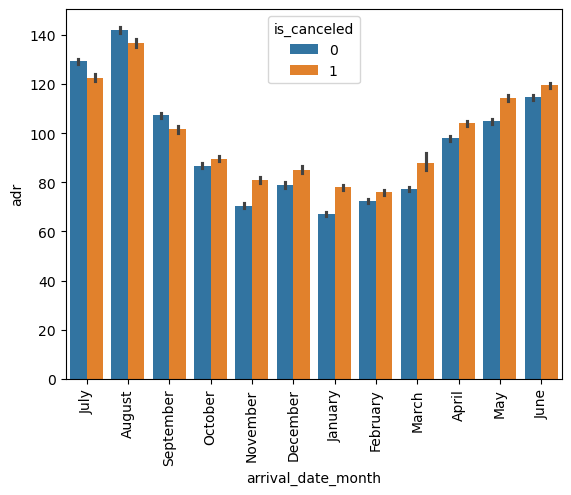

In [269]:

sns.barplot(x='arrival_date_month',y='adr',data=df,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

# Feature Engineering 
----------------------------------------
In feature enginering we choose which feature is important, and what not  ,  and i would choose feature based  on numerical and catagorical values. 

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> Split into X (Feature ) and Y (Target) 

In [271]:
X = df.drop(['is_canceled'],axis=1)
y= df['is_canceled']

## Numerical Values  

In [272]:
X_Numerical = X.select_dtypes(include=['int64', 'int32', 'int16', 'int8','float64'])
X_Categorical= X.select_dtypes(include=['object'])

In [273]:
X_Numerical.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [274]:
X_Numerical['is_canceled']=df['is_canceled']

In [275]:
X_Numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   is_repeated_guest               119390 non-null  int64  
 10  previous_cancellations          119390 non-null  int64  
 11  previous_bookings_not_canceled  119390 non-null  int64  
 12  booking_changes 

<Axes: >

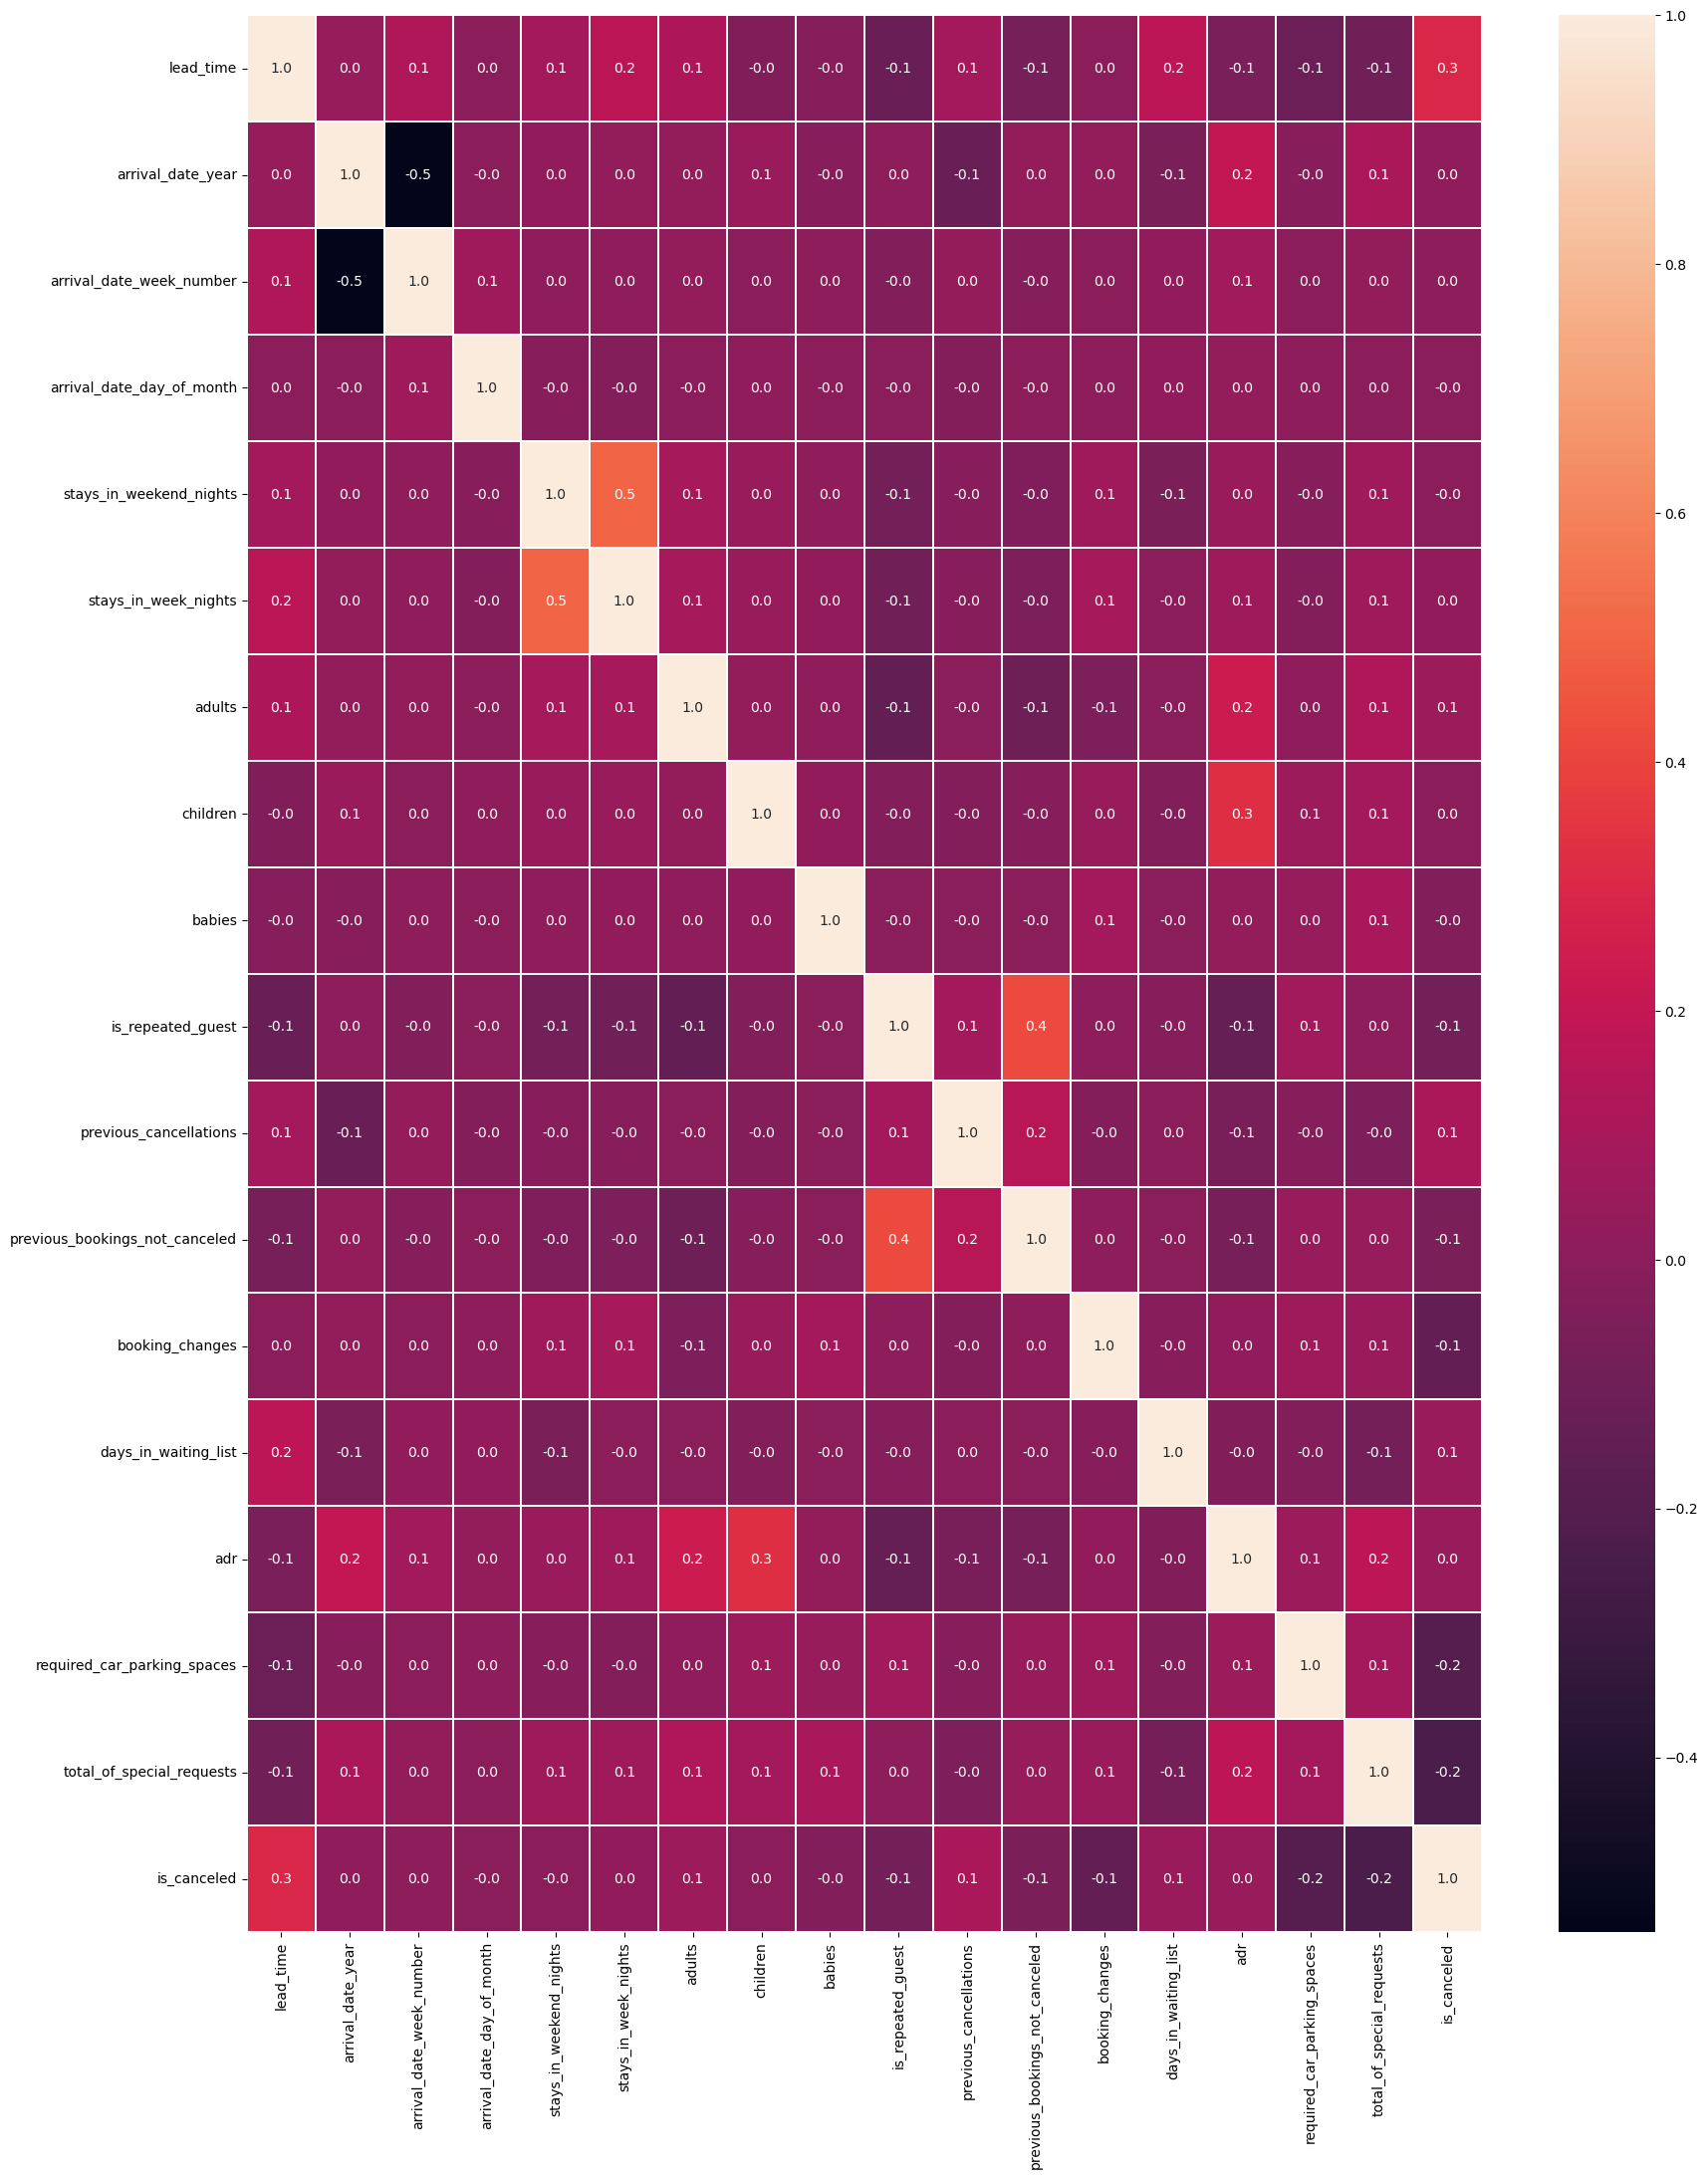

In [276]:
plt.figure(figsize=(20,25))
sns.heatmap(X_Numerical.corr(),annot=True,fmt=".1f",linewidths=0.1,)

In [277]:
X_Numerical['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [278]:
from scipy.stats import pearsonr

# Assuming X_Numerical contains the numerical columns and 'Price' is the target column
for i in X_Numerical.columns:
    corr, pval = pearsonr(X_Numerical[i], X_Numerical['is_canceled'])
    print(f"Pearson correlation {i} with 'Target': {corr}, p-value: {pval}")

Pearson correlation lead_time with 'Target': 0.2931233557607159, p-value: 0.0
Pearson correlation arrival_date_year with 'Target': 0.01665986023872942, p-value: 8.572485641834395e-09
Pearson correlation arrival_date_week_number with 'Target': 0.008148065395052837, p-value: 0.0048715536405070274
Pearson correlation arrival_date_day_of_month with 'Target': -0.006130078862758605, p-value: 0.03416531503782847
Pearson correlation stays_in_weekend_nights with 'Target': -0.0017910780782611256, p-value: 0.5360068239267551
Pearson correlation stays_in_week_nights with 'Target': 0.0247646290458726, p-value: 1.1473295419098604e-17
Pearson correlation adults with 'Target': 0.060017212839567145, p-value: 1.0785654471901769e-95
Pearson correlation children with 'Target': 0.005036254836439033, p-value: 0.08183043560220545
Pearson correlation babies with 'Target': -0.03249108920833159, p-value: 2.923023512897031e-29
Pearson correlation is_repeated_guest with 'Target': -0.08479341835708572, p-value: 2.

In [279]:
X_Numerical.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

In [280]:
Numerical = ['lead_time','required_car_parking_spaces','total_of_special_requests']

In [281]:
X_Numerical_final=df[Numerical]

In [282]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_Numerical_final)

,variables,VIF
0,lead_time,1.141998
1,required_car_parking_spaces,1.046230
2,total_of_special_requests,1.184370


In [283]:
X_Numerical_final

,lead_time,required_car_parking_spaces,total_of_special_requests
0,342,0,0
1,737,0,0
2,7,0,0
3,13,0,0
4,14,0,1
...,...,...,...
119385,23,0,0
119386,102,0,2
119387,34,0,4
119388,109,0,0


## Catagorical values

In [284]:
X_Categorical.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [285]:
X_Categorical['is_canceled']=df['is_canceled']

In [286]:
X_Categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    119390 non-null  object
 1   arrival_date_month       119390 non-null  object
 2   meal                     119390 non-null  object
 3   country                  119390 non-null  object
 4   market_segment           119390 non-null  object
 5   distribution_channel     119390 non-null  object
 6   reserved_room_type       119390 non-null  object
 7   assigned_room_type       119390 non-null  object
 8   deposit_type             119390 non-null  object
 9   customer_type            119390 non-null  object
 10  reservation_status       119390 non-null  object
 11  reservation_status_date  119390 non-null  object
 12  is_canceled              119390 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 11.8+ MB


In [287]:
# Phik untuk mengecek
phik_overview = X_Categorical.phik_matrix()

interval columns not set, guessing: ['is_canceled']


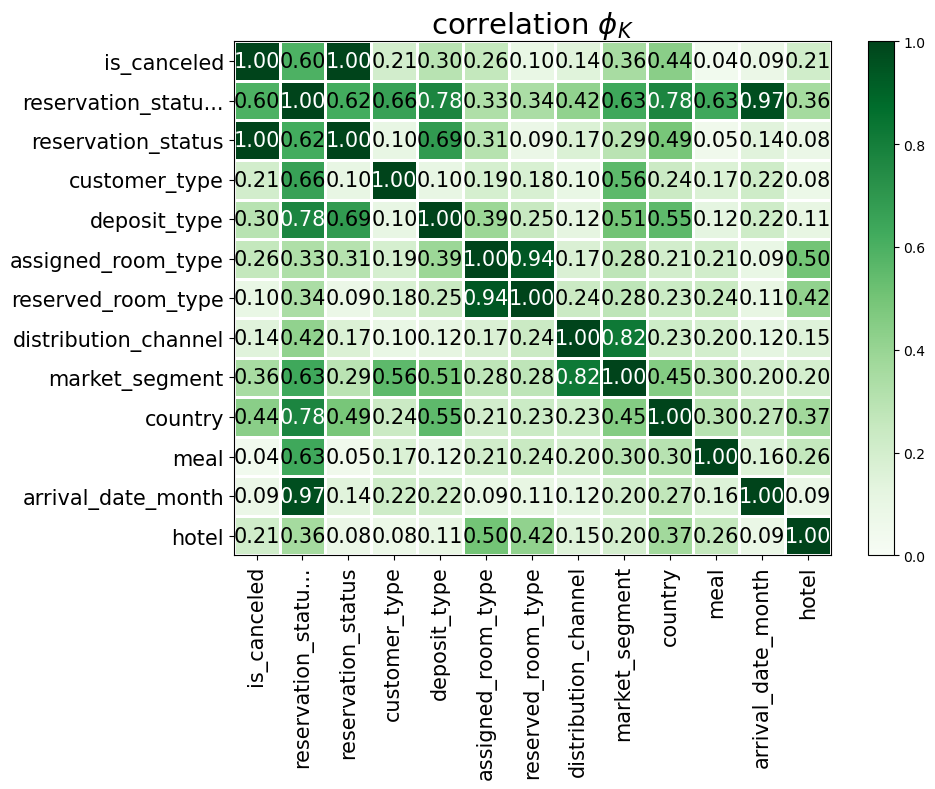

In [288]:
# Plot Phik correlation
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(10, 8))
plt.tight_layout()

In [289]:
X_Categorical.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'is_canceled'],
      dtype='object')

In [290]:
X_Categorical['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [291]:
Categorical=['customer_type','deposit_type','assigned_room_type','market_segment','country',]

In [292]:
X_Categorical_final=df[Categorical]

>Concat  

In [293]:
X=pd.concat([X_Numerical_final,X_Categorical_final],axis=1)

In [294]:
#Splitting between train set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)


print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)

Train size :  (83573, 8)
Test size :  (35817, 8)


In [295]:
X_train_num= X_train[Numerical]
X_train_cat= X_train[Categorical]
  
X_test_num = X_test[Numerical]
X_test_cat = X_test[Categorical] 

In [296]:
X_train_num.skew()

lead_time                      1.344526
required_car_parking_spaces    4.045869
total_of_special_requests      1.357993
dtype: float64

In [297]:

# Assuming X_train_num_trim and X_train_cat have the same columns

X_train_final = np.concatenate([X_train_num, X_train_cat], axis = 1)
X_train_final = pd.DataFrame(X_train_final ,columns=Numerical+Categorical)

In [298]:
X_train_final.columns

Index(['lead_time', 'required_car_parking_spaces', 'total_of_special_requests',
       'customer_type', 'deposit_type', 'assigned_room_type', 'market_segment',
       'country'],
      dtype='object')

In [308]:
X_test.columns

Index(['lead_time', 'required_car_parking_spaces', 'total_of_special_requests',
       'customer_type', 'deposit_type', 'assigned_room_type', 'market_segment',
       'country'],
      dtype='object')

In [299]:
numeric_transformer =Pipeline( 
    steps=[
            ("scaler", MinMaxScaler())
    ]
)

categorical_transformer= Pipeline( 
    steps=[
            ("Enc",OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

    ]
)


In [300]:
preprocessor=ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, Numerical),
        ("cat", categorical_transformer,Categorical)
    ]
)

In [301]:
#pipe_logreg = Pipeline([("preprocessor", preprocessor), ('lin',LogisticRegression())])
pipe_knn    = Pipeline([("preprocessor", preprocessor), ('knn',KNeighborsClassifier())])
# pipe_svc     = Pipeline([("preprocessor", preprocessor), ('svc',SVC())])




In [302]:
# pipe_svc.fit(X_train_final,y_train)
#pipe_logreg.fit(X_train_final, y_train)
pipe_knn.fit(X_train_final,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  Pipeline(steps=[('Enc',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['customer_type',
                                                   'deposit_type',
                                                   'assigned_room_type',
                                                   'market_segment',
                                                   'country'])])),
                ('knn', KNeighborsClassifier())])

In [304]:
pipe_knn.predict(X_test)

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [313]:
def performance_check(model, X, y):
  display_labels =['Not_Cancelled', 'Cancelled']
  y_pred = model.predict(X)
  predictions = np.where(y_pred>= 0.5, 1, 0)

  cm = confusion_matrix(y, predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues)
  plt.show()
  print(classification_report(y, predictions, target_names=display_labels))

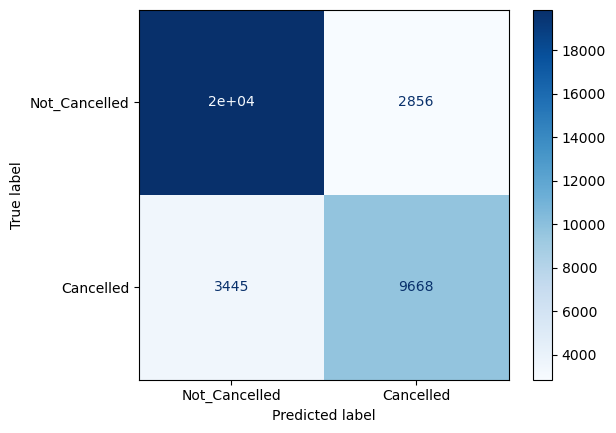

               precision    recall  f1-score   support

Not_Cancelled       0.85      0.87      0.86     22704
    Cancelled       0.77      0.74      0.75     13113

     accuracy                           0.82     35817
    macro avg       0.81      0.81      0.81     35817
 weighted avg       0.82      0.82      0.82     35817



In [314]:

# calling function
performance_check(pipe_knn, X_test, y_test)


The model Perform 80 % of the test set we prepare , i will make it better in the future  , 